In [1]:
import json
import networkx as nx
import seaborn as sns
import matplotlib.pyplot as plt
from collections import defaultdict
import sys
import pandas as pd


%matplotlib inline

### Getting a network from user.json

In [3]:
c = 0
friend_list = {}
with open('./yelp_dataset/yelp_academic_dataset_user.json') as data_file:
    for line in data_file:
        c+=1
        review = json.loads(line)
        uid = review['user_id']
        friends = review['friends']
        #only get nodes with friends (don't want unconnected nodes of degree 0)
        if len(friends)!=0:
            friend_list[uid]=friends
        if c % 100000 == 0:
            print c

100000
200000
300000
400000
500000


In [ ]:
network = nx.Graph(friend_list)

In [ ]:
print 'hi'

In [ ]:
print(nx.diameter(network))

In [76]:
print "Number of nodes in the graph: ", network.number_of_nodes() 
print "Number of edges in the graph: ", network.number_of_edges() 

# Number of nodes in the graph:  552339
# Number of edges in the graph:  1781932

Number of nodes in the graph:  249441
Number of edges in the graph:  1781932


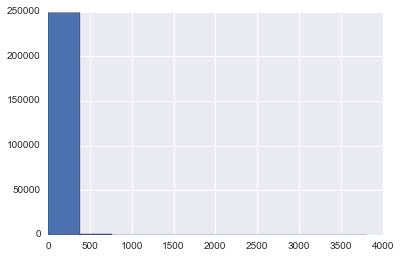

In [77]:
degree_sequence=sorted(nx.degree(network).values()) 
dmax= max(degree_sequence)
h,bins,patches = plt.hist(degree_sequence)

In [79]:
print dmax

3812


In [80]:
print type(degree_sequence)

<type 'list'>


In [81]:
print len(degree_sequence)

249441


In [66]:
print degree_sequence[-500000]

13


In [70]:
def remove_values_from_list(the_list, val):
    return [value for value in the_list if value != val]

x = remove_values_from_list(degree_sequence, 0)
print len(x)

249441


In [71]:
print x[-10:]

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


### Getting a network from review.json

In [5]:
c = 0
user_list = defaultdict(list)
business_list = defaultdict(list)
with open('./yelp_dataset/yelp_academic_dataset_review.json') as data_file:
    for line in data_file:
        c+=1
        review = json.loads(line)
        uid = review['user_id']
        bid =  review['business_id']
        user_list[uid].append(bid)
        business_list[bid].append(uid)


        if c % 10000 == 0:
            print c
            break
# print user_list
# print business_list

10000


In [6]:
print len(user_list), len(business_list)

5679 524


In [7]:
friends_list = {}


for user in user_list:
    for business in user_list[user]:
        if user in friends_list.keys():
            friends_list[user].extend(business_list[business])
        else:
            friends_list[user]=business_list[business]
        

KeyboardInterrupt: 

In [ ]:

sys.getsizeof(friends_list)

#3146000
#49424


In [48]:
print len(friends_list)

740


In [ ]:
review_network = nx.Graph(friends_list)

In [50]:
len(review_network)

740

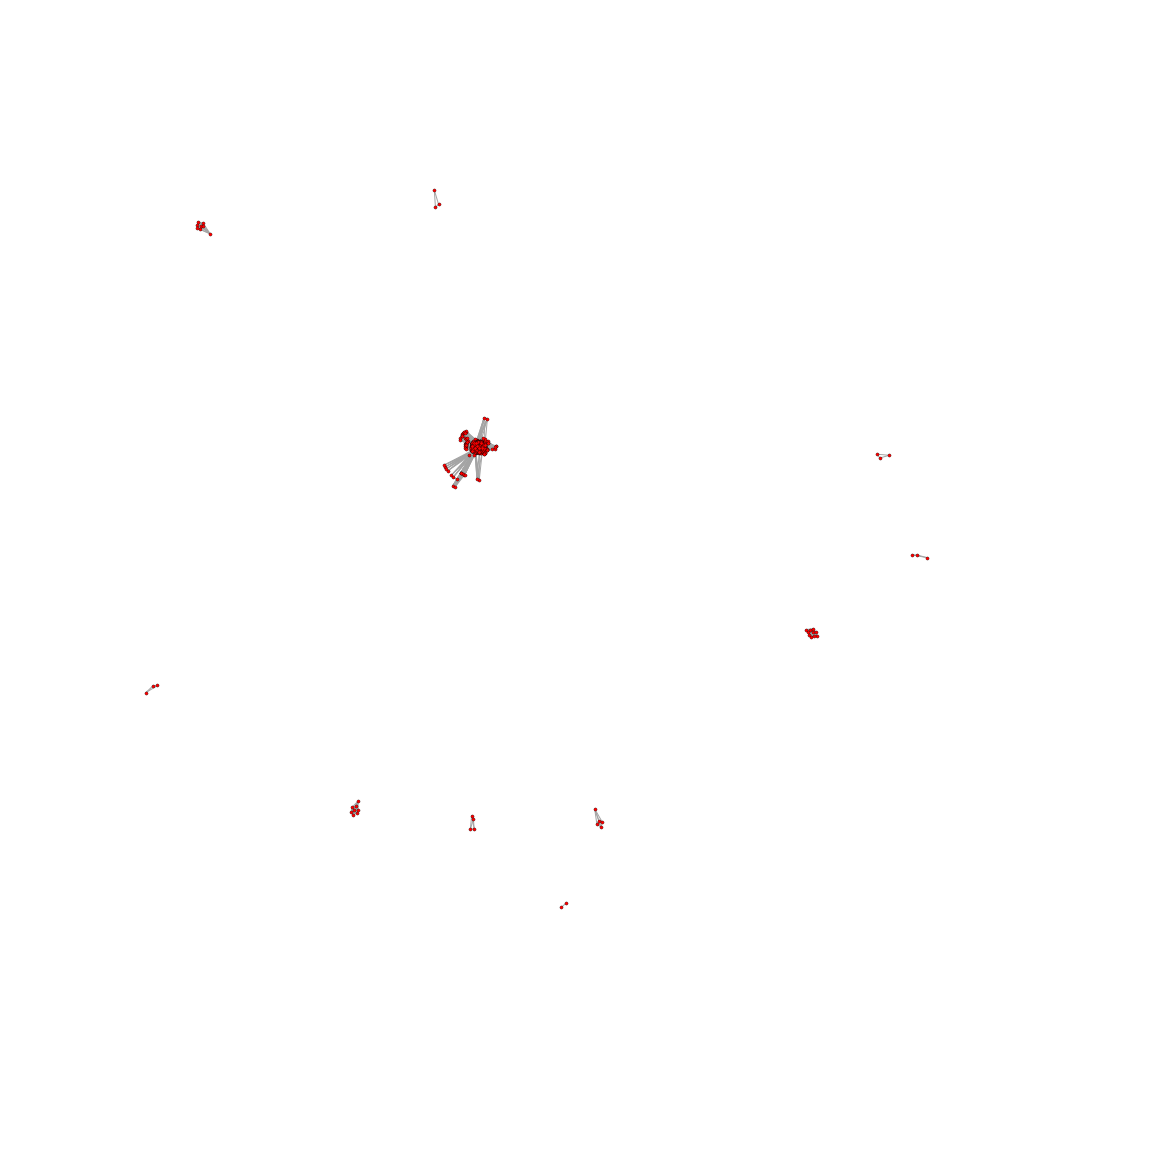

In [51]:
with sns.axes_style('white'):
    fig = plt.subplots(1, figsize=(20,20))
    nx.draw_networkx(review_network, edge_color='#a4a4a4', with_labels=False, font_color='#cacaca', node_size=10)
    plt.axis('off')


### Creating a network graph for PA

In [4]:
PA_df = pd.read_csv(open('PA_business.csv', 'r'))

In [6]:
type(PA_df)

pandas.core.frame.DataFrame

In [7]:
PA_businesses = PA_df.BusinessId.tolist()

In [8]:
print len(PA_businesses), type(PA_businesses)

3754 <type 'list'>


In [9]:
print PA_businesses[:10]

['5UmKMjUEUNdYWqANhGckJw', 'UsFtqoBl7naz8AVUBZMjQQ', '3eu6MEFlq2Dg7bQh8QbdOg', 'cE27W9VPgO88Qxe4ol6y_g', 'HZdLhv6COCleJMo7nPl-RA', 'mVHrayjG3uZ_RLHkLj-AMg', 'VHYT1qgQw5JvXAlUDhTArA', 'KayYbHCt-RkbGcPdGOThNg', 'b12U9TFESStdy7CsTtcOeg', 'Sktj1eHQFuVa-M4bgnEh8g']


In [12]:
c = 0
user_list = defaultdict(list)
business_list = defaultdict(list)
with open('yelp_academic_dataset_review.json') as data_file:
    for line in data_file:
        c+=1
        review = json.loads(line)
        bid =  review['business_id']
        if (bid in PA_businesses):
            uid = review['user_id']
            user_list[uid].append(bid)
            business_list[bid].append(uid)


        if c % 100000 == 0:
            print c
# print user_list
# print business_list

100000
200000
300000
400000
500000
600000
700000
800000
900000
1000000
1100000
1200000
1300000
1400000
1500000
1600000
1700000
1800000
1900000
2000000
2100000
2200000


In [13]:
print len(user_list), len(business_list)

26250 3751


In [ ]:
friends_list = {}


for user in user_list:
    friends_list[user]= (set().union(*user_list[user]))
    

### Getting network graph for ON

In [2]:
ON_df = pd.read_csv(open('ON_business.csv', 'r'))

In [3]:
ON_businesses = ON_df.BusinessId.tolist()

In [4]:
print len(ON_businesses)

474


In [5]:
c = 0
user_list = defaultdict(list)
business_list = defaultdict(list)
with open('yelp_academic_dataset_review.json') as data_file:
    for line in data_file:
        c+=1
        review = json.loads(line)
        bid =  review['business_id']
        if (bid in ON_businesses):
            uid = review['user_id']
            user_list[uid].append(bid)
            business_list[bid].append(uid)


        if c % 100000 == 0:
            print c
# print user_list
# print business_list

100000
200000
300000
400000
500000
600000
700000
800000
900000
1000000
1100000
1200000
1300000
1400000
1500000
1600000
1700000
1800000
1900000
2000000
2100000
2200000


In [6]:
print len(user_list), len(business_list)

1804 474


In [7]:
print type(user_list)

<type 'collections.defaultdict'>


In [14]:
user_list2 = {'bus1': ['1', '2', '3'], 'bus2': ['2','3','4']}

In [20]:
friends_list = {}


for user in user_list:
    friends_list[user]= (set().union(*user_list[user]))

NameError: name 'union' is not defined

In [18]:
print len(friends_list)

1804


In [19]:
print friends_list

{u'Y3ycYY8sfNaQXPWSiTxivw': set([u'-', u'0', u'3', u'2', u'7', u'9', u'8', u'A', u'B', u'E', u'F', u'H', u'J', u'O', u'Q', u'P', u'S', u'Y', u'Z', u'_', u'a', u'd', u'f', u'i', u'k', u'j', u'm', u'o', u'n', u'q', u's', u'r', u't', u'w', u'y', u'x']), u'qmtJwq1ne38U-LjeCyT3cw': set([u'0', u'3', u'4', u'6', u'9', u'A', u'E', u'F', u'I', u'H', u'K', u'M', u'L', u'O', u'R', u'Y', u'X', u'_', u'a', u'c', u'g', u'f', u'i', u'j', u'n', u'q', u'p', u's', u'r', u't', u'w']), u'LXrH8qVL_L0-_7DEQESFRQ': set([u'-', u'1', u'0', u'2', u'5', u'4', u'6', u'9', u'8', u'C', u'B', u'E', u'D', u'G', u'F', u'I', u'H', u'K', u'J', u'M', u'L', u'O', u'N', u'Q', u'P', u'S', u'R', u'U', u'W', u'V', u'X', u'Z', u'_', u'a', u'c', u'b', u'e', u'd', u'g', u'i', u'h', u'k', u'j', u'm', u'l', u'o', u'n', u'q', u'p', u'r', u'u', u't', u'w', u'v', u'x']), u'xVvOchtY_we6nT5WaaESmQ': set([u'-', u'3', u'4', u'7', u'D', u'G', u'F', u'H', u'K', u'J', u'M', u'Q', u'P', u'T', u'V', u'Y', u'Z', u'_', u'c', u'b', u'd', u'i', u